UNIVERSIDAD GALILEO

STATISTICAL LEARNING I

Marco Vinicio Escalante Lara

Carnet: 19001148 

# Regresión en Tensor Flow

In [1]:
import numpy as np 
import tensorflow as tf 
import matplotlib.pyplot as plt

Text(0, 0.5, 'Precio de ventas')

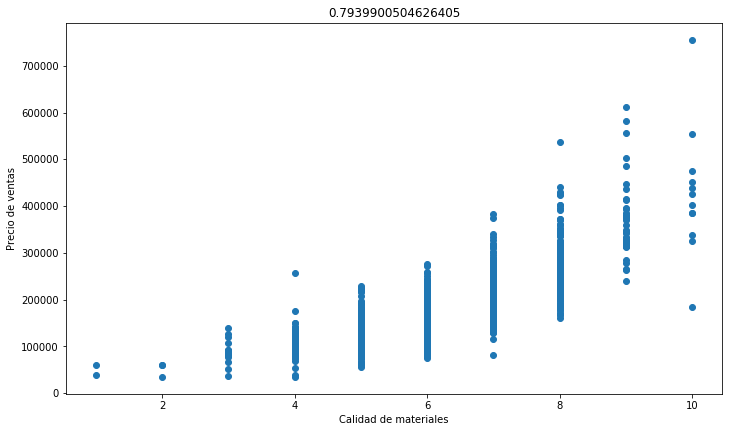

In [2]:
#Cargando la información para trabjar.
datos = np.load('proyecto_training_data.npy')
#Dividiendo datos entre entrenamiento y validación
entreno = datos[:1168][:]

X_train = datos[:1168, 1]
Y_train = datos[:1168, 0]


fig = plt.figure(figsize=(40, 15))

correlacion_1 = np.corrcoef(entreno[:,1],entreno[:,0])
plt.subplot(231)
plt.scatter(X_train, Y_train)
plt.title(correlacion_1[1,0])
plt.xlabel('Calidad de materiales')
plt.ylabel('Precio de ventas')

In [4]:
tf.reset_default_graph()

#Generando nuestro grafo
gra = tf.Graph()
with gra.as_default(): 
    X = tf.placeholder("float") 
    Y = tf.placeholder("float") 
    
    learning_rate = tf.placeholder("float") 
    
    W = tf.Variable(0, name = "W", dtype="float") 
    b = tf.Variable(0, name = "b", dtype="float") 
    
    
    # Hypothesis 
    
    with tf.name_scope("hipotesis"):
        y_pred = tf.add(tf.multiply(X, W, name ="hipotesis_producto_punto"), b, name="hipotesis_sumar_b") 

    # Mean Squared Error Cost Function 
    
    with tf.name_scope("cost"):
        cost = tf.reduce_sum(tf.pow(y_pred-Y, 2)) / (2 * 1168) 
    
    
    # Gradient Descent Optimizer 
    optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost) 
      
    # Global Variables Initializer 
    init = tf.global_variables_initializer() 

    # Summary para el TensorBoard
    testSummary = tf.summary.scalar(name='Funcion_de_costo', tensor = cost)


def regresion_tf(x, y, epochs, learning_r):
    # Starting the Tensorflow Session 
    tf.reset_default_graph() 
    with tf.Session(graph=gra) as sess: 
      
        writer = tf.summary.FileWriter('./regresion/lr='+str(learning_r), sess.graph)    
        # Initializing the Variables 
        sess.run(init) 
      
        # Iterating through all the epochs 
        for epoch in range(epochs): 
          
            # Feeding each data point into the optimizer using Feed Dictionary 
            #for (_x, _y) in zip(x, y): 
            sess.run(optimizer, feed_dict = {X : x, Y : y, learning_rate : learning_r}) 
          
            # Displaying the result after every 50 epochs 
            if (epoch + 1) % 10 == 0: 
                # Calculating the cost a every epoch 
                c = sess.run(cost, feed_dict = {X : x, Y : y}) 
                print("Epoch", (epoch + 1), ": cost =", c, "W =", sess.run(W), "b =", sess.run(b)) 
          
            # Ejecutar el summary 
            summary = sess.run(testSummary, feed_dict = {X : x, Y : y})
            # Agregarlo al tablero
            writer.add_summary(summary, epoch)
            
        # Storing necessary values to be used outside the Session 
        training_cost = sess.run(cost, feed_dict ={X: x, Y: y}) 
        weight = sess.run(W) 
        bias = sess.run(b) 
        
        writer.close()
    
    #Calculating the predictions 
    predictions = weight * x + bias 
    print("Función de Costo =", training_cost, "Peso =", weight, "Intercepto =", bias, '\n')

    # Plotting the Results 
    plt.plot(x, y, 'ro', label ='Datos Originales') 
    plt.plot(x, predictions, label ='Regresión calculada') 
    plt.title('Resultados de Regresión Linear') 
    plt.legend() 
    plt.show() 

# Hipotesis 

## Selección del Learning Rate

Para los casos planteados de LR propuestos (10, 1, 0.1, 0.01, 0.001, 0.0001), se espera que nuestros valores lleguen a converger con rapidez, para los casos mayores a 1 se espera que nuestro valor salte y tome valores altos, pudiendo incluso tomar valores mayore y no converger nunca, ya que nunca llegan a tener un mínimo. Para el caso de valores pequeños tenemos el problema que nuestros datos tardan en converger.


Por lo que nuestra hipotesis sera que nuestro valor que mejore nuestro Learning Rate no tiene que ser mayor que 1 ni muy pequeño, es decir valores entre 0.1 a 0.001 para este ejemplo.

Epoch 10 : cost = inf W = -3.0852585e+30 b = -4.81751e+29
Epoch 20 : cost = nan W = nan b = nan
Epoch 30 : cost = nan W = nan b = nan
Epoch 40 : cost = nan W = nan b = nan
Epoch 50 : cost = nan W = nan b = nan
Epoch 60 : cost = nan W = nan b = nan
Epoch 70 : cost = nan W = nan b = nan
Epoch 80 : cost = nan W = nan b = nan
Epoch 90 : cost = nan W = nan b = nan
Epoch 100 : cost = nan W = nan b = nan
Función de Costo = nan Peso = nan Intercepto = nan 



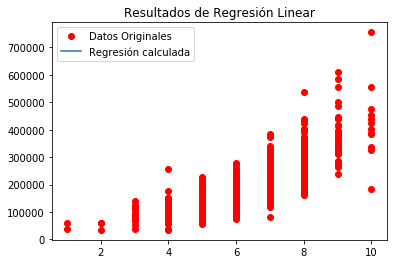

In [5]:
regresion_tf(X_train, Y_train, 100, 10)

Epoch 10 : cost = inf W = -2.4569279e+20 b = -3.8363993e+19
Epoch 20 : cost = inf W = -2.0375454e+36 b = -3.1815544e+35
Epoch 30 : cost = nan W = nan b = nan
Epoch 40 : cost = nan W = nan b = nan
Epoch 50 : cost = nan W = nan b = nan
Epoch 60 : cost = nan W = nan b = nan
Epoch 70 : cost = nan W = nan b = nan
Epoch 80 : cost = nan W = nan b = nan
Epoch 90 : cost = nan W = nan b = nan
Epoch 100 : cost = nan W = nan b = nan
Función de Costo = nan Peso = nan Intercepto = nan 



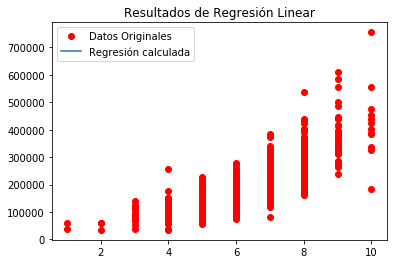

In [6]:
regresion_tf(X_train, Y_train, 100, 1)

Epoch 10 : cost = 6.5921734e+19 W = -1792122900.0 b = -279837950.0
Epoch 20 : cost = 2.4122592e+29 W = -108410810000000.0 b = -16927891000000.0
Epoch 30 : cost = inf W = -6.5579854e+18 b = -1.0240023e+18
Epoch 40 : cost = inf W = -3.967062e+23 b = -6.1944266e+22
Epoch 50 : cost = inf W = -2.399775e+28 b = -3.7471585e+27
Epoch 60 : cost = inf W = -1.4516724e+33 b = -2.2667262e+32
Epoch 70 : cost = nan W = nan b = -inf
Epoch 80 : cost = nan W = nan b = nan
Epoch 90 : cost = nan W = nan b = nan
Epoch 100 : cost = nan W = nan b = nan
Función de Costo = nan Peso = nan Intercepto = nan 



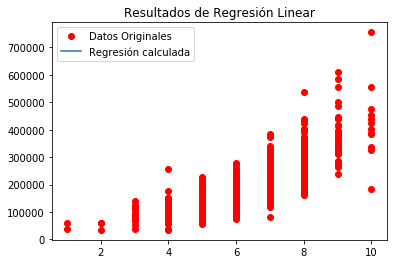

In [7]:
regresion_tf(X_train, Y_train, 100, 0.1)

Epoch 10 : cost = 1393074300.0 W = 29523.895 b = 4120.757
Epoch 20 : cost = 1390117200.0 W = 29774.05 b = 3672.8413
Epoch 30 : cost = 1387824600.0 W = 29848.982 b = 3199.866
Epoch 40 : cost = 1385553200.0 W = 29922.52 b = 2728.9622
Epoch 50 : cost = 1383303800.0 W = 29995.701 b = 2260.2827
Epoch 60 : cost = 1381075600.0 W = 30068.537 b = 1793.8174
Epoch 70 : cost = 1378867800.0 W = 30141.03 b = 1329.5557
Epoch 80 : cost = 1376681100.0 W = 30213.182 b = 867.488
Epoch 90 : cost = 1374515100.0 W = 30284.99 b = 407.60342
Epoch 100 : cost = 1372369700.0 W = 30356.46 b = -50.108665
Función de Costo = 1372369700.0 Peso = 30356.46 Intercepto = -50.108665 



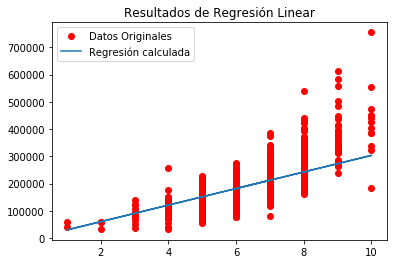

In [8]:
regresion_tf(X_train, Y_train, 100, 0.01)

Epoch 10 : cost = 9345167000.0 W = 9952.115 b = 1504.9626
Epoch 20 : cost = 4903192600.0 W = 16566.113 b = 2488.7139
Epoch 30 : cost = 2942662400.0 W = 20962.498 b = 3126.2168
Epoch 40 : cost = 2077281800.0 W = 23885.654 b = 3533.7039
Epoch 50 : cost = 1695228000.0 W = 25830.098 b = 3788.3916
Epoch 60 : cost = 1526484100.0 W = 27124.35 b = 3941.5776
Epoch 70 : cost = 1451880700.0 W = 27986.658 b = 4027.3408
Epoch 80 : cost = 1418826200.0 W = 28562.014 b = 4068.3206
Epoch 90 : cost = 1404107600.0 W = 28946.742 b = 4079.5564
Epoch 100 : cost = 1397482500.0 W = 29204.824 b = 4071.04
Función de Costo = 1397482500.0 Peso = 29204.824 Intercepto = 4071.04 



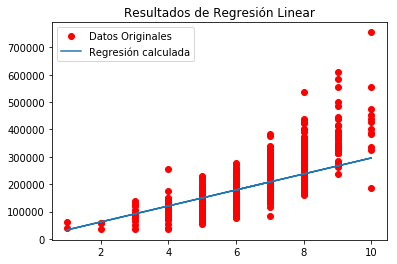

In [9]:
regresion_tf(X_train, Y_train, 100, 0.001)

Epoch 10 : cost = 18019553000.0 W = 1166.7664 b = 177.28299
Epoch 20 : cost = 16736659000.0 W = 2287.641 b = 347.40042
Epoch 30 : cost = 15552758000.0 W = 3364.4304 b = 510.63428
Epoch 40 : cost = 14460213000.0 W = 4398.869 b = 667.2555
Epoch 50 : cost = 13451974000.0 W = 5392.624 b = 817.52435
Epoch 60 : cost = 12521531000.0 W = 6347.2974 b = 961.6909
Epoch 70 : cost = 11662886000.0 W = 7264.4263 b = 1099.9951
Epoch 80 : cost = 10870499000.0 W = 8145.489 b = 1232.668
Epoch 90 : cost = 10139258000.0 W = 8991.903 b = 1359.931
Epoch 100 : cost = 9464440000.0 W = 9805.034 b = 1481.9972
Función de Costo = 9464440000.0 Peso = 9805.034 Intercepto = 1481.9972 



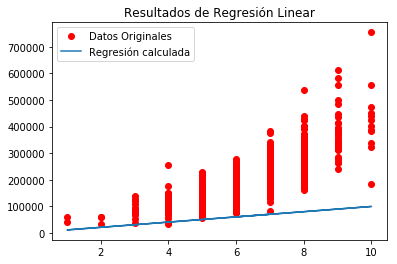

In [10]:
regresion_tf(X_train, Y_train, 100, 0.0001)

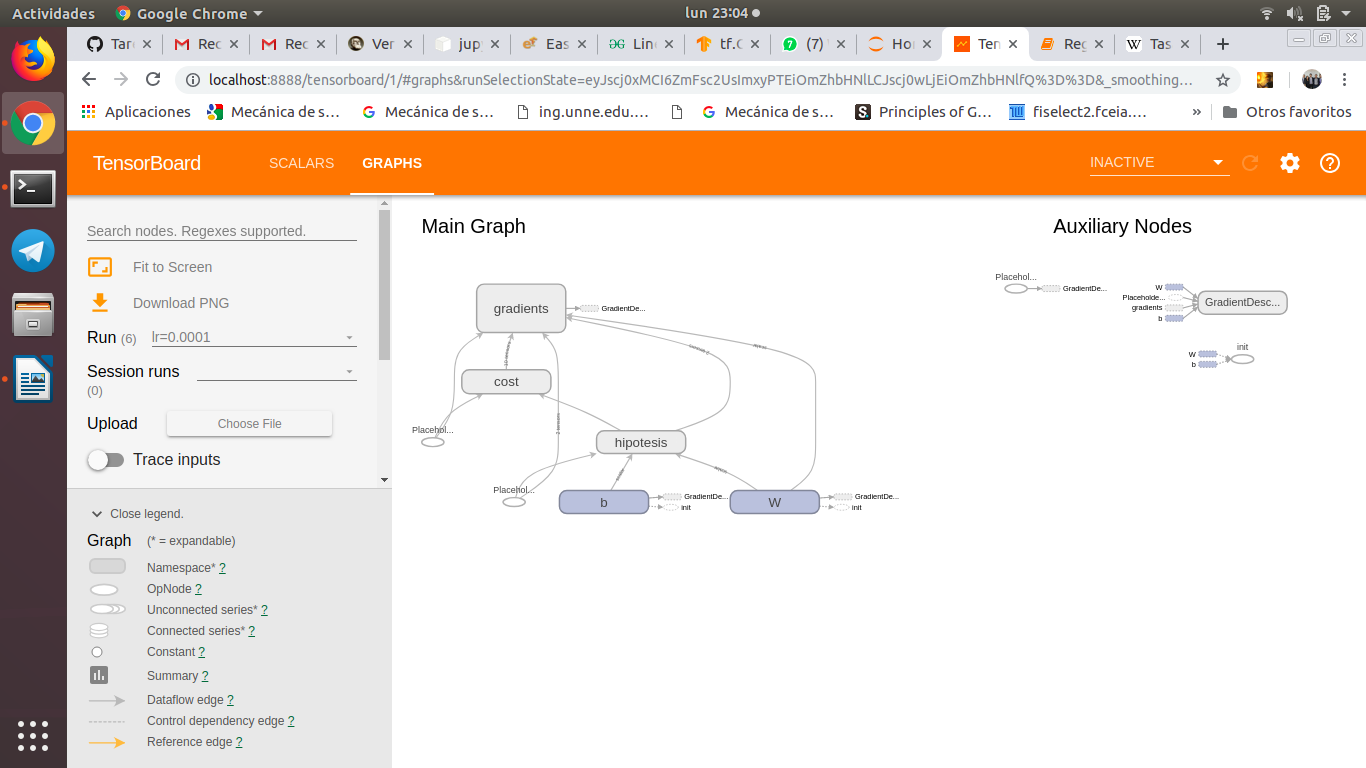

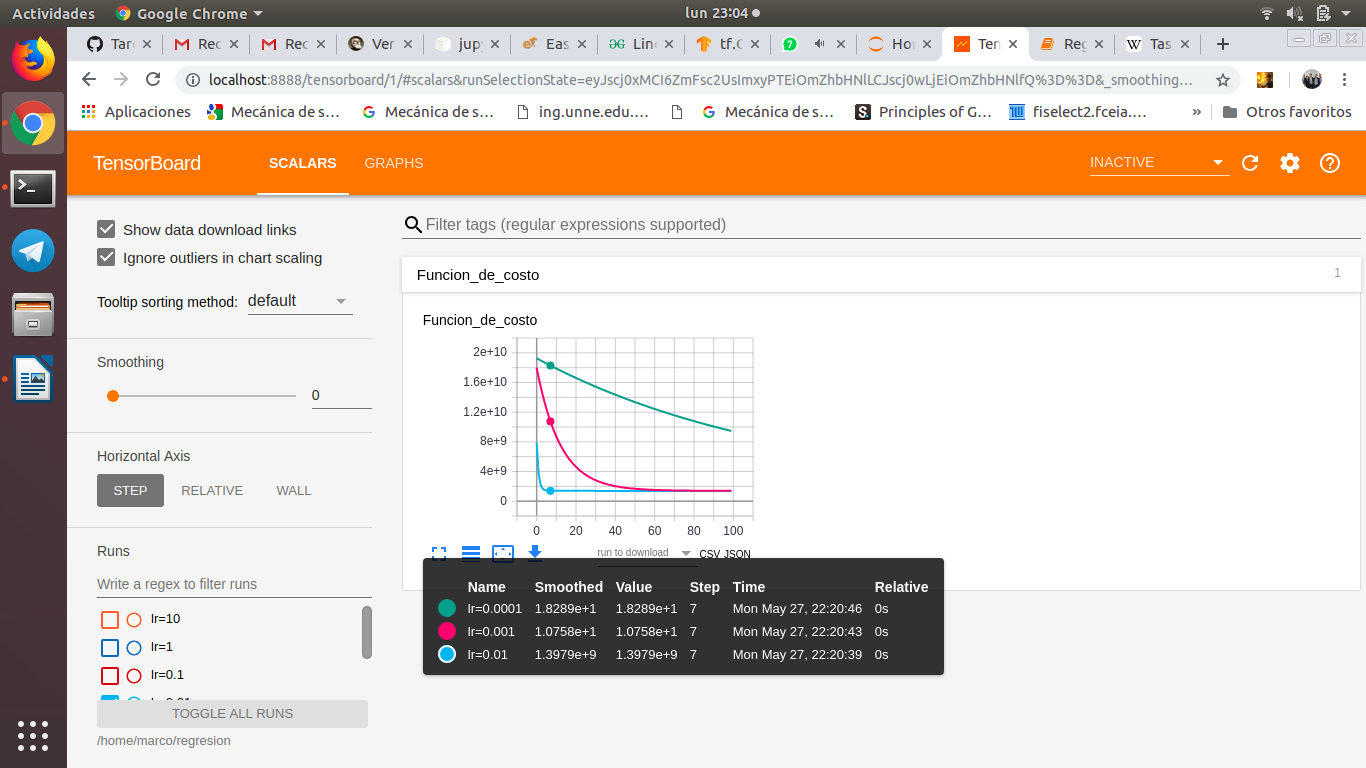

# Conclusiones/Recomendaciones

Para el caso que estamos trabajando al tomar learning rate de 0.1 o superiores los valores que obtenemos presentan datos que no convergen y no tenemos resultados en nuestra evaluación por como van cambiando en el tiempo los mismos.

En la imagen 2 se puede apreciar que el learning rate de 0.01 es el que más rápido converge, es decir a mayor lr no convergieron nuestros valores y a menor tardaron más en llegar a un valor, por lo que sustenta nuestra hipotesis de no tomar ni valores muy pequeños, ni valores muy grande (mayores a 1).

